In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import nltk

In [3]:
#This garbage doesn't work on Google chrome as of May-June 2023
#nltk.download('stopwords')

In [4]:
#Use this instead
stopwords = pd.read_csv('stopwords/english')
stopwords.head()

,i
0,me
1,my
2,myself
3,we
4,our


In [5]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [6]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [7]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [8]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label','message'])

In [9]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [13]:
messages['length'] = messages['message'].apply(len)

In [14]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: ylabel='Frequency'>

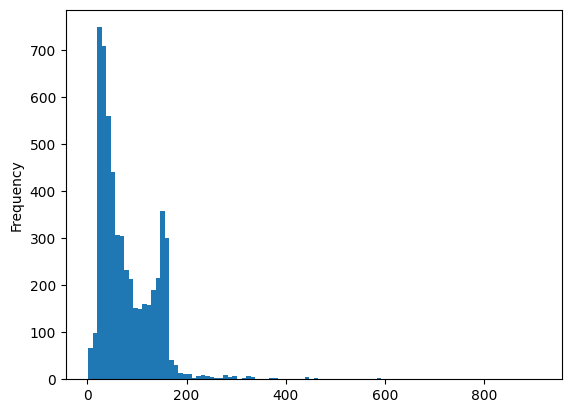

In [15]:
messages['length'].plot.hist(bins=100)

<Axes: ylabel='Frequency'>

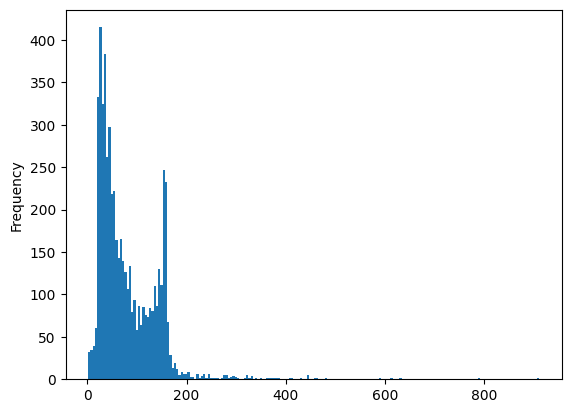

In [16]:
messages['length'].plot.hist(bins=200)

In [17]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [18]:
messages[messages['length']==910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [19]:
#To print out the entire message
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

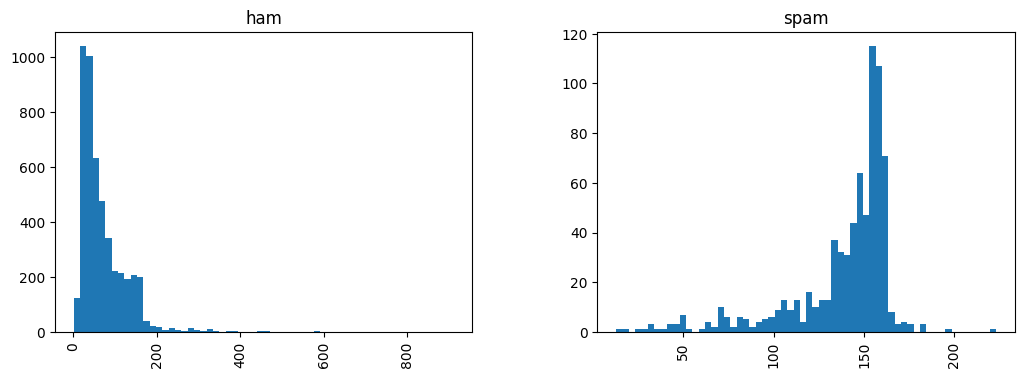

In [20]:
messages.hist(column='length', by='label', bins=60, figsize=(12,4))

#Spam messages are lengthy than Ham messages

In [21]:
import string

In [22]:
#Punctuation removal
mess = 'Sample message! Alpha Bravo Charlie!!!'

In [23]:
nopunc = [c for c in mess if c not in string.punctuation]

In [24]:
nopunc #Punctuation removed

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'A',
 'l',
 'p',
 'h',
 'a',
 ' ',
 'B',
 'r',
 'a',
 'v',
 'o',
 ' ',
 'C',
 'h',
 'a',
 'r',
 'l',
 'i',
 'e']

In [25]:
nopunc = ''.join(nopunc)

In [26]:
#Punctuation gone
nopunc

'Sample message Alpha Bravo Charlie'

In [29]:
x = ['a','b','c','d']
''.join(x)

'abcd'

In [30]:
'69'.join(x)

'a69b69c69d'

In [31]:
#Using above to clean mess
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords]

In [32]:
clean_mess

['Sample', 'message', 'Alpha', 'Bravo', 'Charlie']

In [33]:
def text_process(mess):
    #Punctuation removal
    nopunc = [char for char in mess if char not in string.punctuation]

    #Remove stop words
    nopunc = ''.join(nopunc)

    #Return list of clean text words
    return [word for word in nopunc.split() if word.lower() not in stopwords]


In [34]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [35]:
#Tokenization of messages
messages['message'].head().apply(text_process)

0    [Go, until, jurong, point, crazy, Available, o...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, in, 2, a, wkly, comp, to, win, F...
3    [U, dun, say, so, early, hor, U, c, already, t...
4    [Nah, dont, think, he, goes, to, usf, he, live...
Name: message, dtype: object

In [36]:
'''Stemming: run, ran, running will return as run as they are same'''
'''Above is normalization'''

'Above is normalization'

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [39]:
print(len(bow_transformer.vocabulary_))

11745


In [40]:
mess4 = messages['message'][3]
print(mess4)

U dun say so early hor... U c already then say...


In [41]:
bow4 = bow_transformer.transform([mess4])

In [42]:
bow4

<1x11745 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [43]:
print(bow4)

  (0, 4220)	2
  (0, 4827)	1
  (0, 5475)	1
  (0, 6426)	1
  (0, 6446)	1
  (0, 7426)	1
  (0, 9830)	2
  (0, 10172)	1
  (0, 10701)	1


In [44]:
print(bow4.shape)

(1, 11745)


In [46]:
#Checking which one appared twice
bow_transformer.get_feature_names_out()[9830]

'say'

In [47]:
messages_bow = bow_transformer.transform(messages['message'])

In [48]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11745)


In [49]:
#Non-zero occurences
messages_bow.nnz

77727

In [50]:
sparsity = (100.0*messages_bow.nnz / (messages_bow.shape[0]*messages_bow.shape[1]))
print('Sparsity: {}'.format(round(sparsity)))

Sparsity: 0


In [51]:
print('Sparsity: {}'.format(sparsity))

Sparsity: 0.11877027905445857


In [52]:
from sklearn.feature_extraction.text import TfidfTransformer

In [53]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [54]:
tfidf4 = tfidf_transformer.transform(bow4)

In [55]:
print(tfidf4)

  (0, 10701)	0.2214828525636521
  (0, 10172)	0.19345051326676527
  (0, 9830)	0.5147493130794172
  (0, 7426)	0.41952836023632145
  (0, 6446)	0.3046289560740644
  (0, 6426)	0.28629349827015765
  (0, 5475)	0.2841540501592932
  (0, 4827)	0.25442769469153637
  (0, 4220)	0.3902711884065556


In [56]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [57]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [58]:
messages_tfidf

<5572x11745 sparse matrix of type '<class 'numpy.float64'>'
	with 77727 stored elements in Compressed Sparse Row format>

In [59]:
print(messages_tfidf)

  (0, 11478)	0.21855504963873507
  (0, 11267)	0.18103318020806286
  (0, 11058)	0.21020910692462205
  (0, 10706)	0.15050190348292852
  (0, 9190)	0.23448127195105944
  (0, 8861)	0.14930144145582272
  (0, 8593)	0.16179833391078444
  (0, 7917)	0.25060458188390206
  (0, 7803)	0.29664226225883145
  (0, 7572)	0.1000361242444051
  (0, 7165)	0.1741376499534408
  (0, 7134)	0.14387486073434363
  (0, 6440)	0.1795347681564248
  (0, 5984)	0.23713942356414208
  (0, 5430)	0.25503904814595973
  (0, 5429)	0.2831771039390715
  (0, 4852)	0.29664226225883145
  (0, 2113)	0.22972901219607492
  (0, 1521)	0.29664226225883145
  (0, 1133)	0.2736234220713668
  (1, 11384)	0.40061560982443056
  (1, 10994)	0.2063637481323008
  (1, 8856)	0.5043405901305854
  (1, 7950)	0.3767401070812794
  (1, 3176)	0.2911995411244838
  :	:
  (5570, 8049)	0.15111583150287675
  (5570, 7691)	0.12495544580139799
  (5570, 7637)	0.2691669819914582
  (5570, 7572)	0.10744584736069711
  (5570, 7528)	0.2347435257089788
  (5570, 7289)	0.1780224

In [60]:
#NAIVE BAYES CLASSIFICATION
from sklearn.naive_bayes import MultinomialNB

In [61]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [63]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [64]:
#Model created to detect ham vs spam
messages['label']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [65]:
all_pred = spam_detect_model.predict(messages_tfidf)
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [66]:
#Checking for the predictions made
from sklearn.model_selection import train_test_split

In [67]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'],messages['label'], test_size=0.3)

In [68]:
#Real world method, time saving
from sklearn.pipeline import Pipeline

In [70]:
pipeline = Pipeline([('bow', CountVectorizer(analyzer=text_process)), 
                     ('tfidf', TfidfTransformer()),
                     ('Classifier', MultinomialNB())
                     ])

In [71]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000019AEA67EC10>)),
                ('tfidf', TfidfTransformer()),
                ('Classifier', MultinomialNB())])

In [72]:
predictions = pipeline.predict(msg_test)

In [73]:
from sklearn.metrics import classification_report

In [74]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1453
        spam       1.00      0.60      0.75       219

    accuracy                           0.95      1672
   macro avg       0.97      0.80      0.86      1672
weighted avg       0.95      0.95      0.94      1672

